# An Ensemble of Rotated Decision Trees

## Outline
This project creates majority vote ensembles of decision trees such that each one is fitted for a rotated version of the data. As such, it will only categorize two-dimensional data. My hope is that the ensembles will be able to categorize data beyond clear cuts along the two axes, much like a random forest. Unlike a random forest, I hope this model will be at least somewhat more interpretable while maintaining comparable accuracy. <br><br>
First I created the rotated decision tree, which acts as a decision tree on a rotated version of the data. I also made a function that returns a majority vote ensemble of such decision trees. Both the rotated decision tree and the ensemble will rely on scikit-learn components, both to save time in developing this project and to utilize whatever speed benefits have been programmed into a professional Python library. <br><br>
Afterwards, I read in the data files. The first will a large data set from the Center for Economic and Policy Research (CEPR) concerning various demographic characteristics of over 290,000 Americans. From this the model attempts to classify whether someone is in a union based on their weekly pay and total yearly wage (which are not always aligned depending on whether someone had the same job the whole year, overtime pay, etc.). For the second set of data, the model will be classifying whether buildings across the US used by the General Services Adminstration (GSA) are federally owned or leased to the (GSA) based on the total square footage and square footage available. And for the third set
of data, provided by the Office of Federal Student Aid, the model will classify whether American colleges are public or private/proprietary based on the
number of government-subsidized loan recipients and the total dollar amount of the loans at each
college. All of these use binary classification, for the sake of consistency. <br><br>
My initial idea was to create 60 ensembles of rotated decision trees and 60 random forests—20 ensembles and random forests for each data set. This turned out to be impractical. For one, at least with the way I set up this project, the majority vote ensembles turned out to be virtually identical to each other (looking at both their decision regions and their accuracy), so there was little point in having so many. On top of that, each of my ensembles takes a long time to train, and having 60 would be unreasonable. Instead, I decided to use 4 ensembles and random forests for each data set, and I made different criteria for accuracy and interpretability. <br><br>
Upon creation, the get_RDT_vote function returns majority vote ensembles of rotated decision trees already fitted to the training set. So next, 12 such ensembles are created—4 for each data set. Likewise, 12 random forests—4 for each data set—are created and fitted to their respective training sets. <br><br>
Cross-validation was used in testing whether my ensembles worked the way I expected. I kept the code I used to document my progress, but there is no reason to run it, as it takes a long time and is not necessary. <br><br>
In order for the ensemble to succeed, it must successfully meet my criteria for both accuracy and interpretability. As part of the tests, the majority vote ensembles of rotated decision trees and random forests are paired up and compared to each other one by one.<br><br>
The decision regions of each pair of majority vote ensembles of rotated decision trees and of random forests will be plotted, along with some of the testing data. My model will be overall successful in terms of interpretability if my ensembles are reasonably interpretable at least 2/3 of the time and at least once for each data set. My understanding remains that an ensemble will be reasonably interpretable if (a) the graphical display of the categorization consists of relatively simple shapes such as arcs and circles while lacking many seemingly random lines or (b) I can intuitively reason how the model came to conclusions about where to draw boundaries better than I could for the random forest in the same pair. <br><br>
Lastly, the accuracy of each pair of ensembles and random forests will be shown. Each ensemble will be sufficiently accurate if it is more than 95% as accurate in classifying the testing data as the random forest in the same pair. My model will be overall successful in terms of accuracy if, for each data set, at least 3 of the 4 ensembles are "sufficiently accurate". <br><br>
Note that that several sections of this project take awhile to run, especially the Majority Vote Ensemble section. The Cross-validation and Reviewing Accuracy sections also take time to run, but the Cross-validation section does not have to be executed. Also note that my evaluation of the interpretability of decision boundaries may not make sense if the Plotting Data section is executed again.

#### Data Citations (see README.md for more details)
 * Center for Economic and Policy Research. 2020. CPS ORG Uniform Extracts, Version 2.5. Washington, DC. https://xvk.aml.mybluehost.me/cps-uniform-data-extracts/cps-outgoing-rotation-group/cps-org-data/.
 * General Services Administration. 2025. "Inventory of Owned and Leased Properties (IOLP)." Last updated April 11, 2025. https://web.archive.org/web/20250412095936/https://catalog.data.gov/dataset/inventory-of-owned-and-leased-properties-iolp.
 * Office of Federal Student Aid. 2023. "National Student Loan Data System." Last updated August 12, 2023. https://catalog.data.gov/dataset/national-student-loan-data-system-722b0.


## Import Packages
The cell below imports most packages and must be executed first. <br> <br>
For TAs, it is necessary to install openpyxl, as one of the data sets examined is stored in an excel file. Prof. Spector said he needed to update scikit-learn and pandas as well, so this may be necessary.

In [1]:
%matplotlib inline
import matplotlib
import matplotlib.pyplot as plt
from matplotlib import colors as clr
from matplotlib.colors import ListedColormap
from distutils.version import LooseVersion
import random
import numpy as np
import pandas as pd
from sklearn.ensemble import RandomForestClassifier
from sklearn.ensemble import VotingClassifier
from sklearn.pipeline import make_pipeline
from sklearn.model_selection import cross_val_score
from sklearn.model_selection import train_test_split

## Status during Prototype
At the time I drafted the prototype, I have created the first version of the Rotated Decision Tree and the associated fit and predict functions. This model relied on rotating data about the mean and standardizing it and then sending that data to an ordinary scikit-learn decision tree. <br><br>
From looking at data points, it seems to work as expected. I also imported the data, formatted it, and removed null values. I then split the data into training and testing sets. This code is all included, with only minor changes, in the Preparing Data Sets section. Standardization seemed not necessary then, as that is done after the data is rotated for the Rotated Decision Tree. It did, however, turn out to be important to the functionality of plot_decision_regions as well as the random forests, so I ended up standardizing all data sets. <br> <br>
I plan to check whether my Rotated Decision Tree properly rotates and standardizes the data set, and it did. I also planned on creating the ensemble of many such Rotated Decision Trees and looking over how its decision boundaries are graphed; the decision bounderies were not as smooth as I expected, but upon reflection, did not surprise me. I lastly planned to test the accuracy of the ensembles and random forests, which I have since done, although the test criteria and number of ensembles and random forests were different than I initially intended.

## Prototype Rotated Decision Tree
This was the original version of the Rotated Decision Tree I created in my Prototype. Much of the code is the same as what I included in the Rotated Decision Tree class for this project. (However, there is an error in \_\_get_standard_deviation, namely, that the wrong mean is subtracted from x\[axis\].) <br><br>
The Rotated Decision Tree below contains an instance of the Decision Tree Classifier, into which a rotated version of the data is fitted and predicted. I had some concern that this caused bugs, so I decided upon a different approach. <br><br>
All other code from the Prototype is either already included and largely unchanged in this project or minor enough to leave out.

In [2]:
class RotatedDecisionTreePrototype:
    def __init__(self, degrees, criterion='gini', splitter='best', max_depth=4, min_samples_split=2, min_samples_leaf=1, min_weight_fraction_leaf=0.0, max_features=None, random_state=None, max_leaf_nodes=None, min_impurity_decrease=0.0, class_weight=None, ccp_alpha=0.0, monotonic_cst=None):
        self.decision_tree = DecisionTreeClassifier(criterion=criterion, splitter=splitter, max_depth=max_depth, min_samples_split=min_samples_split, min_samples_leaf=min_samples_leaf, min_weight_fraction_leaf=min_weight_fraction_leaf, max_features=max_features, random_state=random_state, max_leaf_nodes=max_leaf_nodes, min_impurity_decrease=min_impurity_decrease, class_weight=class_weight, ccp_alpha=ccp_alpha, monotonic_cst=monotonic_cst)
        self.radians = math.radians(degrees)
        self.mean_0 = None
        self.mean_1 = None
        self.std_dev_0 = None
        self.std_dev_1 = None
    
    def fit(self, X_input, y, mean_0, mean_1):
        X = X_input.copy()
        self.mean_0 = mean_0
        self.mean_1 = mean_1
        if self.radians != 0:
            X = self.__rotate(X)
        self.std_dev_0 = self.__get_standard_deviation(X, self.mean_0, 0)
        self.std_dev_1 = self.__get_standard_deviation(X, self.mean_1, 1)
        X = self.__standardize(X)
        print(X)
        self.decision_tree.fit(X, y)
    
    def predict(self, X_input):
        if self.mean_0 == None:
            print("Error: Please fit to data first")
            return None
        X = X_input.copy()
        if self.radians != 0:
            X = self.__rotate(X)
        X = self.__standardize(X)
        return self.decision_tree.predict(X)
    
    def __rotate(self, values):
        for i in range(len(values)):
            values[i][0] = values[i][0] * math.cos(self.radians) - values[i][1] * math.sin(self.radians)
            values[i][1] = values[i][0] * math.sin(self.radians) + values[i][1] * math.cos(self.radians)
        return values
    
    def __get_standard_deviation(self, values, mean, axis):
        sum = 0
        for x in values:
            # The "mean" here is actually the mean of the original data set.
            # At this point, the mean of the data set should be centered at (0, 0).
            # As such subtracting "mean" here is a mistake and, if anything, 0 should be subtracted instead.
            sum += (x[axis] - mean) ** 2
        return (sum / len(values))**0.5
    
    def __standardize(self, values):
        for i in range(len(values)):
            values[i][0] = values[i][0] / self.std_dev_0
            values[i][1] = values[i][1] / self.std_dev_1
        return values

## The Rotated Decision Tree
For the sake of makine the Rotated Decision Tree work, I directly added code onto the Decision Tree Classifier class (and associated code) from the scikit-learn library. Although using that code here may take more space, this was the most surefire way to find and eliminate bugs in my code and maximize compatibility with functions that work with scikit-learn. I have written some code in the fit method and, for the sake of simplicity, wrote the rest of my code at the end of the class. <br> <br>
Note that all methods discussed below, when called on a data set, must specifically be called on a data set that has been centered around its mean. (The Rotated Decision Tree is not designed to check whether this is the case in order to save computation time.) <br> <br>
The fit method of RotatedDecisionTree first checks if the data set is two-dimensional and consists of floats. If not, then the data is not altered and a non-rotated Decision Tree is fit to it (this case will not be tested). If so, a copy of the inputed X values is created, the copy simply called X, and X is passed to the \_\_transform\_X\_fitting method towards the bottom of the class. The \_\_transform\_X\_fitting method calls functions that rotate X about the origin (assumed to be the mean), calculate the standard deviations for each variable of the rotated X, and divide all values by their standard deviation. What is left is a standardized, rotated version of the X values as well as the y values of the original data set, which are then fitted to the scikit-learn decision tree. <br> <br>
The predict method operates very similarly in copying the input X set and passing it to the \_\_transform\_X\_predicting method (if the data set is two-dimensional and consists of floats). Next, the \_\_transform\_X\_predicting method calls functions that rotate X and divide all values by their standard deviation, only it uses the standard deviations from the X input to the fit method, rather than the current X. The predict method then returns what the result of the predict method from the scikit-learn decision tree would be if it were called on this rotated set.

In [3]:
# Authors: The scikit-learn developers
# SPDX-License-Identifier: BSD-3-Clause

from sklearn.tree import BaseDecisionTree
import math

import copy
import numbers
from abc import ABCMeta, abstractmethod
from math import ceil
from numbers import Integral, Real
from scipy.sparse import issparse
from sklearn.utils import metadata_routing
from sklearn.base import (
    BaseEstimator,
    ClassifierMixin,
    MultiOutputMixin,
    RegressorMixin,
    _fit_context,
    clone,
    is_classifier,
)
from sklearn.utils import Bunch, check_random_state, compute_sample_weight
from sklearn.utils._param_validation import Hidden, Interval, RealNotInt, StrOptions
from sklearn.utils.multiclass import check_classification_targets
from sklearn.utils.validation import (
    _assert_all_finite_element_wise,
    _check_n_features,
    _check_sample_weight,
    assert_all_finite,
    check_is_fitted,
    validate_data,
)
from sklearn.tree import _criterion, _splitter, _tree
from sklearn.tree._criterion import Criterion
from sklearn.tree._splitter import Splitter
from sklearn.tree._tree import (
    BestFirstTreeBuilder,
    DepthFirstTreeBuilder,
    Tree,
    _build_pruned_tree_ccp,
    ccp_pruning_path,
)
from sklearn.tree._utils import _any_isnan_axis0

__all__ = [
    "DecisionTreeClassifier",
    "DecisionTreeRegressor",
    "ExtraTreeClassifier",
    "ExtraTreeRegressor",
]


# =============================================================================
# Types and constants
# =============================================================================

DTYPE = _tree.DTYPE
DOUBLE = _tree.DOUBLE

CRITERIA_CLF = {
    "gini": _criterion.Gini,
    "log_loss": _criterion.Entropy,
    "entropy": _criterion.Entropy,
}
CRITERIA_REG = {
    "squared_error": _criterion.MSE,
    "friedman_mse": _criterion.FriedmanMSE,
    "absolute_error": _criterion.MAE,
    "poisson": _criterion.Poisson,
}

DENSE_SPLITTERS = {"best": _splitter.BestSplitter, "random": _splitter.RandomSplitter}

SPARSE_SPLITTERS = {
    "best": _splitter.BestSparseSplitter,
    "random": _splitter.RandomSparseSplitter,
}


class RotatedDecisionTree(ClassifierMixin, BaseDecisionTree):

    # "check_input" is used for optimisation and isn't something to be passed
    # around in a pipeline.
    __metadata_request__predict_proba = {"check_input": metadata_routing.UNUSED}
    __metadata_request__fit = {"check_input": metadata_routing.UNUSED}

    _parameter_constraints: dict = {
        **BaseDecisionTree._parameter_constraints,
        "criterion": [StrOptions({"gini", "entropy", "log_loss"}), Hidden(Criterion)],
        "class_weight": [dict, list, StrOptions({"balanced"}), None],
    }

    def __init__(
        self,
        *,
        degrees,
        criterion="gini",
        splitter="best",
        max_depth=None,
        min_samples_split=2,
        min_samples_leaf=1,
        min_weight_fraction_leaf=0.0,
        max_features=None,
        random_state=None,
        max_leaf_nodes=None,
        min_impurity_decrease=0.0,
        class_weight=None,
        ccp_alpha=0.0,
        monotonic_cst=None,
    ):
        self.degrees = degrees
        super().__init__(
            criterion=criterion,
            splitter=splitter,
            max_depth=max_depth,
            min_samples_split=min_samples_split,
            min_samples_leaf=min_samples_leaf,
            min_weight_fraction_leaf=min_weight_fraction_leaf,
            max_features=max_features,
            max_leaf_nodes=max_leaf_nodes,
            class_weight=class_weight,
            random_state=random_state,
            min_impurity_decrease=min_impurity_decrease,
            monotonic_cst=monotonic_cst,
            ccp_alpha=ccp_alpha,
        )

    # Fits the input X and y values to the Decision Tree, following rotation and standardization of the X input
    # Note: (0, 0) must be the mean of X_input
    @_fit_context(prefer_skip_nested_validation=True)
    def fit(self, X_input, y, sample_weight=None, check_input=True):
        """Build a decision tree classifier from the training set (X, y).

        Parameters
        ----------
        X : {array-like, sparse matrix} of shape (n_samples, n_features)
            The training input samples. Internally, it will be converted to
            ``dtype=np.float32`` and if a sparse matrix is provided
            to a sparse ``csc_matrix``.

        y : array-like of shape (n_samples,) or (n_samples, n_outputs)
            The target values (class labels) as integers or strings.

        sample_weight : array-like of shape (n_samples,), default=None
            Sample weights. If None, then samples are equally weighted. Splits
            that would create child nodes with net zero or negative weight are
            ignored while searching for a split in each node. Splits are also
            ignored if they would result in any single class carrying a
            negative weight in either child node.

        check_input : bool, default=True
            Allow to bypass several input checking.
            Don't use this parameter unless you know what you're doing.

        Returns
        -------
        self : DecisionTreeClassifier
            Fitted estimator.
        """

        # These two blocks of code are written by Maxine Dobbs.
        # Checks if data set is of a correct format. If so, performs rotation and standardization.
        # If not, keeps X the same and fits as a normal decision tree. This option will not occur in the tests.
        if (type(X_input) == np.ndarray or type(X_input) == pd.core.frame.DataFrame) and \
                len(X_input) > 0 and X_input[0].size == 2 and \
                (type(X_input[0][0]) == np.float64 or type(X_input[0][0]) == np.float32):
            X = X_input.copy() # copied so as to not change the input X values, which can be used elsewhere
            self.__transform_X_fitting(X)
        else:
            X = X_input

        super()._fit(
            X,
            y,
            sample_weight=sample_weight,
            check_input=check_input,
        )
        return self
    

    def predict_proba(self, X, check_input=True):
        """Predict class probabilities of the input samples X.

        The predicted class probability is the fraction of samples of the same
        class in a leaf.

        Parameters
        ----------
        X : {array-like, sparse matrix} of shape (n_samples, n_features)
            The input samples. Internally, it will be converted to
            ``dtype=np.float32`` and if a sparse matrix is provided
            to a sparse ``csr_matrix``.

        check_input : bool, default=True
            Allow to bypass several input checking.
            Don't use this parameter unless you know what you're doing.

        Returns
        -------
        proba : ndarray of shape (n_samples, n_classes) or list of n_outputs \
            such arrays if n_outputs > 1
            The class probabilities of the input samples. The order of the
            classes corresponds to that in the attribute :term:`classes_`.
        """
        check_is_fitted(self)
        proba = self.predict(X)

        if self.n_outputs_ == 1:
            return proba[:, : self.n_classes_]
        else:
            all_proba = []
            for k in range(self.n_outputs_):
                proba_k = proba[:, k, : self.n_classes_[k]]
                all_proba.append(proba_k)
            return all_proba

    def predict_log_proba(self, X):
        """Predict class log-probabilities of the input samples X.

        Parameters
        ----------
        X : {array-like, sparse matrix} of shape (n_samples, n_features)
            The input samples. Internally, it will be converted to
            ``dtype=np.float32`` and if a sparse matrix is provided
            to a sparse ``csr_matrix``.

        Returns
        -------
        proba : ndarray of shape (n_samples, n_classes) or list of n_outputs \
            such arrays if n_outputs > 1
            The class log-probabilities of the input samples. The order of the
            classes corresponds to that in the attribute :term:`classes_`.
        """
        proba = self.predict_proba(X)

        if self.n_outputs_ == 1:
            return np.log(proba)

        else:
            for k in range(self.n_outputs_):
                proba[k] = np.log(proba[k])

            return proba

    def __sklearn_tags__(self):
        tags = super().__sklearn_tags__()
        # XXX: nan is only support for dense arrays, but we set this for common test to
        # pass, specifically: check_estimators_nan_inf
        allow_nan = self.splitter in ("best", "random") and self.criterion in {
            "gini",
            "log_loss",
            "entropy",
        }
        tags.classifier_tags.multi_label = True
        tags.input_tags.allow_nan = allow_nan
        return tags
    
    
    # All the code below is written by Maxine Dobbs.
    
    # Predicts the classification for each value of the input X, following rotation and standardization
    # Note: (0, 0) must be the mean of X_input
    def predict(self, X_input, check_input = True):
        
        # Checks if data set is of a correct format. If so, performs rotation and standardization
        # If not, keeps X the same and predicts as a normal decision tree. This option will not occur in the tests
        if (type(X_input) == np.ndarray or type(X_input) == pd.core.frame.DataFrame) and \
                len(X_input) > 0 and X_input[0].size == 2 and \
                (type(X_input[0][0]) == np.float64 or type(X_input[0][0]) == np.float32):
            X = X_input.copy() # copied so as to not change the input X values, which can be used elsewhere
            self.__transform_X_predicting(X)
        else:
            X = X_input
            
        # Calls the predict method of BaseDecisionTree on X
        # Note that this method will check whether the fit method has been called
        return super().predict( X, check_input )
    
    # Calls functions that rotate X, get the standard deviation of X, and standardize X
    def __transform_X_fitting(self, X):
        if self.degrees != 0:
            self.__rotate(X)
        self._std_dev_0 = self.__get_standard_deviation(X, 0)
        self._std_dev_1 = self.__get_standard_deviation(X, 1)
        self.__standardize(X)
        
    # Calls functions that rotate X and standardize X
    # The standard deviation was calculated during __transform_X_fitting()
    def __transform_X_predicting(self, X):
        if self.degrees != 0:
            self.__rotate(X)
        self.__standardize(X)
    
    # Rotates all X values about the origin, using self.degrees
    def __rotate(self, values):
        radians = math.radians(self.degrees)
        for i in range(len(values)):
            values[i][0] = values[i][0] * math.cos(radians) - values[i][1] * math.sin(radians)
            values[i][1] = values[i][0] * math.sin(radians) + values[i][1] * math.cos(radians)
    
    # Caculates the standard deviation of X values for some feature
    # Note: Subtraction by the mean is not necessary since the mean is 0.
    def __get_standard_deviation(self, values, feature):
        sum = 0
        for x in values:
            sum += (x[feature]) ** 2
        return (sum / len(values))**0.5
    
    # Standardizes the X values by dividing all of them by their standard deviation
    # Note: Subtraction by the mean is not necessary since the mean is (0, 0).
    def __standardize(self, values):
        for i in range(len(values)):
            values[i][0] = values[i][0] / self._std_dev_0
            values[i][1] = values[i][1] / self._std_dev_1

## Majority Vote Ensemble
This function returns a majority vote ensemble fitted to X and y, where the pipelines are rotated decision trees, each rotated a different amount. There is one rotated decision tree for each rotation amount, so number_rotations is the same as the number of rotated decision trees used in the ensemble. For thirty such rotated decision trees, each is rotated 3 degrees more than the last one.

In [4]:
def get_RDT_vote(X, y, number_rotations, random_state):
    trees = []
    for i in range(number_rotations):
        tree = make_pipeline(RotatedDecisionTree(degrees = i * 90 / number_rotations,
                                                 max_depth=4, criterion='gini', random_state=random_state))
        tree.fit(X, y)
        trees.append(("tree" + str(i), tree))
    mv_clf = VotingClassifier(estimators=trees)
    mv_clf.fit(X, y)
    return mv_clf

## Preparing Data Sets
Loads in the data sets and removes null values. The student loans data set, in particular, required additional formatting to remove dollar signs, commas, and spaces. It also used dashes instead of "NA", which had to be removed manually.

In [5]:
df_union = pd.read_csv("data/cepr_org_2019.csv", sep=",", usecols=["Weekly Pay", "Yearly Wage", "Union"])
df_buildings = pd.read_excel("data/2025-4-11-iolp-buildings.xlsx", usecols=["Building Rentable Square Feet", "Available Square Feet", "Owned or Leased"])
df_loans = pd.read_csv("data/FL_Dashboard_AY2009_2010_Q1.csv", header = 5, usecols=["Recipients", "$ of Loans Originated", "School Type"])

df_loans["$ of Loans Originated"] = df_loans["$ of Loans Originated"].str.replace(',','')
df_loans["$ of Loans Originated"] = df_loans["$ of Loans Originated"].str.replace('$','')
df_loans["$ of Loans Originated"] = df_loans["$ of Loans Originated"].str.replace(' ','')

df_loans = df_loans[df_loans["$ of Loans Originated"].str.contains("-") == False]
df_union = df_union.dropna(axis=0)
df_buildings = df_buildings.dropna(axis=0)
df_loans = df_loans.dropna(axis=0)

This code splits each data set into training and testing sets.

In [6]:
X_train_union_init, X_test_union_init, y_train_union_init, y_test_union_init = train_test_split(
    df_union[["Weekly Pay", "Yearly Wage"]].values, 
    np.where(df_union["Union"].values == 0.0, 0, 1), test_size=0.4, random_state=1)

X_train_buildings_init, X_test_buildings_init, y_train_buildings_init, y_test_buildings_init = train_test_split(
    df_buildings[["Building Rentable Square Feet", "Available Square Feet"]].values,
    np.where(df_buildings["Owned or Leased"] == 'L', 0, 1), test_size=0.4, random_state=1)

X_train_loans_init, X_test_loans_init, y_train_loans_init, y_test_loans_init = train_test_split(
    df_loans[["Recipients", "$ of Loans Originated"]].values.astype(float),
    np.where(df_loans["School Type"] == 'PUBLIC', 1, 0), test_size=0.4, random_state=1)

## Copying Elements
All the data sets are dominated by one class. To make the classifiers produce worthwhile results, the elements of the less common class must be copied some number of times until elements of the two classes are roughly 50-50.

In [7]:
tally = 0
for union_aff in y_train_union_init:
    if union_aff:
        tally += 1

print("Total affiliated with union:", tally)
print("Portion of people affiliated with union:", tally / len(y_train_union_init))

tally = 0
for building_ownership in y_train_buildings_init:
    if building_ownership:
        tally += 1

print("Total GSA-owned buildings:", tally)
print("Portion of GSA buildings owned by the GSA:", tally / len(y_train_buildings_init))

tally = 0
for school_type in y_train_loans_init:
    if school_type:
        tally += 1

print("Total public colleges:", tally)
print("Portion of colleges that are public:", tally / len(y_train_loans_init))

Total affiliated with union: 10407
Portion of people affiliated with union: 0.11445193502622926
Total GSA-owned buildings: 1070
Portion of GSA buildings owned by the GSA: 0.20684322443456407
Total public colleges: 606
Portion of colleges that are public: 0.2726045883940621


From the above results, I have calculated that in order to make the classes have roughly equal numbers of elements, there must be 8 copies of each union-affiliated data point, 4 copies of each GSA-owned building data point, and 3 copies of each public college data point. The code below adds these copies to the training and testing sets.

In [8]:
data_train = []
for i in range(len(y_train_union_init)):
    if y_train_union_init[i]:
        data_train += 8 * [[X_train_union_init[i, 0], X_train_union_init[i, 1], y_train_union_init[i]]]
    else:
        data_train.append([X_train_union_init[i, 0], X_train_union_init[i, 1], y_train_union_init[i]])

df_train = pd.DataFrame(data_train)
X_train_union = df_train.iloc[0:len(data_train), [0, 1]].values
y_train_union = df_train.iloc[0:len(data_train), 2].values

data_test = []
for i in range(len(y_test_union_init)):
    if y_test_union_init[i]:
        data_test += 8 * [[X_test_union_init[i, 0], X_test_union_init[i, 1], y_test_union_init[i]]]
    else:
        data_test.append([X_test_union_init[i, 0], X_test_union_init[i, 1], y_test_union_init[i]])

df_test = pd.DataFrame(data_test)
X_test_union = df_test.iloc[0:len(data_test), [0, 1]].values
y_test_union = df_test.iloc[0:len(data_test), 2].values


data_train = []
for i in range(len(y_train_buildings_init)):
    if y_train_buildings_init[i]:
        data_train += 4 * [[X_train_buildings_init[i, 0], X_train_buildings_init[i, 1], y_train_buildings_init[i]]]
    else:
        data_train.append([X_train_buildings_init[i, 0], X_train_buildings_init[i, 1], y_train_buildings_init[i]])

df_train = pd.DataFrame(data_train)
X_train_buildings = df_train.iloc[0:len(data_train), [0, 1]].values
y_train_buildings = df_train.iloc[0:len(data_train), 2].values

data_test = []
for i in range(len(y_test_buildings_init)):
    if y_test_buildings_init[i]:
        data_test += 4 * [[X_test_buildings_init[i, 0], X_test_buildings_init[i, 1], y_test_buildings_init[i]]]
    else:
        data_test.append([X_test_buildings_init[i, 0], X_test_buildings_init[i, 1], y_test_buildings_init[i]])

df_test = pd.DataFrame(data_test)
X_test_buildings = df_test.iloc[0:len(data_test), [0, 1]].values
y_test_buildings = df_test.iloc[0:len(data_test), 2].values


data_train = []
for i in range(len(y_train_loans_init)):
    if y_train_loans_init[i]:
        data_train += 3 * [[X_train_loans_init[i, 0], X_train_loans_init[i, 1], y_train_loans_init[i]]]
    else:
        data_train.append([X_train_loans_init[i, 0], X_train_loans_init[i, 1], y_train_loans_init[i]])

df_train = pd.DataFrame(data_train)
X_train_loans = df_train.iloc[0:len(data_train), [0, 1]].values
y_train_loans = df_train.iloc[0:len(data_train), 2].values

data_test = []
for i in range(len(y_test_loans_init)):
    if y_test_loans_init[i]:
        data_test += 3 * [[X_test_loans_init[i, 0], X_test_loans_init[i, 1], y_test_loans_init[i]]]
    else:
        data_test.append([X_test_loans_init[i, 0], X_test_loans_init[i, 1], y_test_loans_init[i]])

df_test = pd.DataFrame(data_test)
X_test_loans = df_test.iloc[0:len(data_test), [0, 1]].values
y_test_loans = df_test.iloc[0:len(data_test), 2].values

The code below checks my work.

In [9]:
tally = 0
for union_aff in y_train_union:
    if union_aff:
        tally += 1

print("Total affiliated with union:", tally)
print("Portion of people affiliated with union:", tally / len(y_train_union))

tally = 0
for building_ownership in y_train_buildings:
    if building_ownership:
        tally += 1

print("Total GSA-owned buildings:", tally)
print("Portion of GSA buildings owned by the GSA:", tally / len(y_train_buildings))

tally = 0
for school_type in y_train_loans:
    if school_type:
        tally += 1

print("Total public colleges:", tally)
print("Portion of colleges that are public:", tally / len(y_train_loans))

Total affiliated with union: 83256
Portion of people affiliated with union: 0.5083466643871583
Total GSA-owned buildings: 4280
Portion of GSA buildings owned by the GSA: 0.5105570798043659
Total public colleges: 1818
Portion of colleges that are public: 0.5292576419213973


So now, each class of each data set contains about 50% of the elements, which is the intended result.

## Calculating and Subtracting Mean
This code gets the mean of the training sets for each feature. Then, for both the training and testing sets, the mean of the corresponding training set is subtracted from every element of the set for each feature.

In [10]:
# Caculates the mean of X values for some feature
def get_mean(values, feature):
    sum = 0
    for x in values:
        sum += x[feature]
    return sum / len(values)

# Subtracts the mean from every data point for each feature in a given array
# As a result, the data set has a mean of 0.
def subtract_mean(values, mean_0, mean_1):
    for i in range(len(values)):
        values[i][0] = values[i][0] - mean_0
        values[i][1] = values[i][1] - mean_1

mean_union_0 = get_mean(X_train_union, 0)
mean_union_1 = get_mean(X_train_union, 1)
mean_buildings_0 = get_mean(X_train_buildings, 0)
mean_buildings_1 = get_mean(X_train_buildings, 1)
mean_loans_0 = get_mean(X_train_loans, 0)
mean_loans_1 = get_mean(X_train_loans, 1)

subtract_mean(X_train_union, mean_union_0, mean_union_1)
subtract_mean(X_test_union, mean_union_0, mean_union_1)
subtract_mean(X_train_buildings, mean_buildings_0, mean_buildings_1)
subtract_mean(X_test_buildings, mean_buildings_0, mean_buildings_1)
subtract_mean(X_train_loans, mean_loans_0, mean_loans_1)
subtract_mean(X_test_loans, mean_loans_0, mean_loans_1)

## Calculating and Dividing by Standard Deviation
Similarly, this code gets the standard deviation of the training sets for each feature. Then, for both the training and testing sets, every element of the set for each feature is divided by the standard deviation of the corresponding training set. <br>
This standardization is required for both the random forest classifiers and the plot_decision_regions method (seen later) to function properly. (If not for plot_decision_regions(), standardization here would not be necessary for the ensemble of rotated decision trees, as the rotated decision trees have their own standardization function.)

In [11]:
# Caculates the standard deviation of X values for some feature
# Note: Subtraction by the mean is not necessary since the mean is 0.
def get_standard_deviation(values, feature):
    sum = 0
    for x in values:
        sum += (x[feature]) ** 2
    return (sum / len(values))**0.5
    
# Standardizes the X values by dividing all of them by their standard deviation
# Note: Subtraction by the mean is not necessary since the mean is (0, 0).
def standardize(values, std_dev_0, std_dev_1):
    for i in range(len(values)):
        values[i][0] = values[i][0] / std_dev_0
        values[i][1] = values[i][1] / std_dev_1
        
std_dev_union_0 = get_standard_deviation(X_train_union, 0)
std_dev_union_1 = get_standard_deviation(X_train_union, 1)
std_dev_buildings_0 = get_standard_deviation(X_train_buildings, 0)
std_dev_buildings_1 = get_standard_deviation(X_train_buildings, 1)
std_dev_loans_0 = get_standard_deviation(X_train_loans, 0)
std_dev_loans_1 = get_standard_deviation(X_train_loans, 1)

X_train_union_std = X_train_union.copy()
X_test_union_std = X_test_union.copy()
X_train_buildings_std = X_train_buildings.copy()
X_test_buildings_std = X_test_buildings.copy()
X_train_loans_std = X_train_loans.copy()
X_test_loans_std = X_test_loans.copy()

standardize(X_train_union_std, std_dev_union_0, std_dev_union_1)
standardize(X_test_union_std, std_dev_union_0, std_dev_union_1)
standardize(X_train_buildings_std, std_dev_buildings_0, std_dev_buildings_1)
standardize(X_test_buildings_std, std_dev_buildings_0, std_dev_buildings_1)
standardize(X_train_loans_std, std_dev_loans_0, std_dev_loans_1)
standardize(X_test_loans_std, std_dev_loans_0, std_dev_loans_1)

## Creating and Fitting Ensembles of Rotated Decision Trees
Here, 4 majority vote ensembles for each of the three data sets are created and fitted by the get_RDT_vote function.  These are the ensembles I will be testing. <br>
This code takes some time to run.

In [12]:
mv_RDT_union_1 = get_RDT_vote(X = X_train_union_std, y = y_train_union, number_rotations = 30, random_state = 0)
mv_RDT_union_2 = get_RDT_vote(X = X_train_union_std, y = y_train_union, number_rotations = 30, random_state = 1)
mv_RDT_union_3 = get_RDT_vote(X = X_train_union_std, y = y_train_union, number_rotations = 30, random_state = 2)
mv_RDT_union_4 = get_RDT_vote(X = X_train_union_std, y = y_train_union, number_rotations = 30, random_state = 3)

mv_RDT_buildings_1 = get_RDT_vote(X = X_train_buildings_std, y = y_train_buildings, number_rotations = 30, random_state = 0)
mv_RDT_buildings_2 = get_RDT_vote(X = X_train_buildings_std, y = y_train_buildings, number_rotations = 30, random_state = 1)
mv_RDT_buildings_3 = get_RDT_vote(X = X_train_buildings_std, y = y_train_buildings, number_rotations = 30, random_state = 2)
mv_RDT_buildings_4 = get_RDT_vote(X = X_train_buildings_std, y = y_train_buildings, number_rotations = 30, random_state = 3)

mv_RDT_loans_1 = get_RDT_vote(X = X_train_loans_std, y = y_train_loans, number_rotations = 30, random_state = 0)
mv_RDT_loans_2 = get_RDT_vote(X = X_train_loans_std, y = y_train_loans, number_rotations = 30, random_state = 1)
mv_RDT_loans_3 = get_RDT_vote(X = X_train_loans_std, y = y_train_loans, number_rotations = 30, random_state = 2)
mv_RDT_loans_4 = get_RDT_vote(X = X_train_loans_std, y = y_train_loans, number_rotations = 30, random_state = 3)

## Creating and Fitting Random Forests
Here, 4 random forests for each of the three data sets are created and fitted. The ensembles will be tested against these random forests in terms of accuracy and interpretability.

In [13]:
from sklearn.ensemble import RandomForestClassifier

forest_union_1 = RandomForestClassifier(criterion='gini', n_estimators = 30, max_depth=4,
                                        random_state=0, n_jobs=2)
forest_union_1.fit(X_train_union_std, y_train_union)

forest_union_2 = RandomForestClassifier(criterion='gini', n_estimators = 30, max_depth=4,
                                        random_state=1, n_jobs=2)
forest_union_2.fit(X_train_union_std, y_train_union)

forest_union_3 = RandomForestClassifier(criterion='gini', n_estimators = 30, max_depth=4,
                                        random_state=2, n_jobs=2)
forest_union_3.fit(X_train_union_std, y_train_union)

forest_union_4 = RandomForestClassifier(criterion='gini', n_estimators = 30, max_depth=4,
                                        random_state=3, n_jobs=2)
forest_union_4.fit(X_train_union_std, y_train_union)


forest_buildings_1 = RandomForestClassifier(criterion='gini', n_estimators = 30, max_depth=4,
                                            random_state=0, n_jobs=2)
forest_buildings_1.fit(X_train_buildings_std, y_train_buildings)

forest_buildings_2 = RandomForestClassifier(criterion='gini', n_estimators = 30, max_depth=4,
                                            random_state=1, n_jobs=2)
forest_buildings_2.fit(X_train_buildings_std, y_train_buildings)

forest_buildings_3 = RandomForestClassifier(criterion='gini', n_estimators = 30, max_depth=4,
                                            random_state=2, n_jobs=2)
forest_buildings_3.fit(X_train_buildings_std, y_train_buildings)

forest_buildings_4 = RandomForestClassifier(criterion='gini', n_estimators = 30, max_depth=4,
                                            random_state=3, n_jobs=2)
forest_buildings_4.fit(X_train_buildings_std, y_train_buildings)


forest_loans_1 = RandomForestClassifier(criterion='gini', n_estimators = 30, max_depth=4,
                                        random_state=0, n_jobs=2)
forest_loans_1.fit(X_train_loans_std, y_train_loans)

forest_loans_2 = RandomForestClassifier(criterion='gini', n_estimators = 30, max_depth=4,
                                        random_state=1, n_jobs=2)
forest_loans_2.fit(X_train_loans_std, y_train_loans)

forest_loans_3 = RandomForestClassifier(criterion='gini', n_estimators = 30, max_depth=4,
                                        random_state=2, n_jobs=2)
forest_loans_3.fit(X_train_loans_std, y_train_loans)

forest_loans_4 = RandomForestClassifier(criterion='gini', n_estimators = 30, max_depth=4,
                                        random_state=3, n_jobs=2)
forest_loans_4.fit(X_train_loans_std, y_train_loans)

RandomForestClassifier(max_depth=4, n_estimators=30, n_jobs=2, random_state=3)

## Cross-validation
I used this code to get an idea as to wheter my ensembles were working properly. It is not strictly necessary to the results of this project, and I commented out the union sections, which take a particularly long time to run. I only kept it here for documenting my progress. <br>
I recommend not running this code, as it will take awhile and does not affect the rest of the project.

In [14]:
# clf_union_labels = ["Rotated Decision Tree Ensemble 1 - Union Affiliation", "Random Forest 1 - Union Affiliation",
#                     "Rotated Decision Tree Ensemble 2 - Union Affiliation", "Random Forest 2 - Union Affiliation",
#                     "Rotated Decision Tree Ensemble 3 - Union Affiliation", "Random Forest 3 - Union Affiliation",
#                     "Rotated Decision Tree Ensemble 4 - Union Affiliation", "Random Forest 4 - Union Affiliation"]

clf_buildings_labels =  ["Rotated Decision Tree Ensemble 1 - Federally Owned or Leased GSA Buidlings",
                        "Random Forest 1 - Federally Owned or Leased GSA Buildings",
                        "Rotated Decision Tree Ensemble 2 - Federally Owned or Leased GSA Buidlings",
                        "Random Forest 2 - Federally Owned or Leased GSA Buildings",
                        "Rotated Decision Tree Ensemble 3 - Federally Owned or Leased GSA Buidlings",
                        "Random Forest 3 - Federally Owned or Leased GSA Buildings",
                        "Rotated Decision Tree Ensemble 4 - Federally Owned or Leased GSA Buidlings",
                        "Random Forest 4 - Federally Owned or Leased GSA Buildings"]

clf_loans_labels = ["Rotated Decision Tree Ensemble 1 - School Type by Loans",
                    "Random Forest 1 - School Type by Loans",
                    "Rotated Decision Tree Ensemble 2 - School Type by Loans",
                    "Random Forest 2 - School Type by Loans",
                    "Rotated Decision Tree Ensemble 3 - School Type by Loans",
                    "Random Forest 3 - School Type by Loans"
                    "Rotated Decision Tree Ensemble 4 - School Type by Loans",
                    "Random Forest 4 - School Type by Loans"]

# union_clf = [mv_RDT_union_1, forest_union_1, mv_RDT_union_2, forest_union_2,
#              mv_RDT_union_3, forest_union_3, mv_RDT_union_4, forest_union_4]

buildings_clf = [mv_RDT_buildings_1, forest_buildings_1, mv_RDT_buildings_2, forest_buildings_2,
                 mv_RDT_buildings_3, forest_buildings_3, mv_RDT_buildings_4, forest_buildings_4]

loans_clf = [mv_RDT_loans_1, forest_loans_1, mv_RDT_loans_2, forest_loans_2,
             mv_RDT_loans_3, forest_loans_3, mv_RDT_loans_4, forest_loans_4]

# for clf, label in zip(union_clf, clf_union_labels):
#     scores = cross_val_score(estimator=clf,
#                              X=X_train_union,
#                              y=y_train_union,
#                              cv=10,
#                              scoring='accuracy')
#     print("Accuracy: " + str(round(scores.mean(), 2)) + 
#           " Stdev: " + str(round(scores.std(), 3)) +
#           " [" + label + "]")
# print("")

for clf, label in zip(buildings_clf, clf_buildings_labels):
    scores = cross_val_score(estimator=clf,
                             X=X_train_buildings,
                             y=y_train_buildings,
                             cv=10,
                             scoring='accuracy')
    print("Accuracy: " + str(round(scores.mean(), 2)) + 
          " Stdev: " + str(round(scores.std(), 3)) +
          " [" + label + "]")
print("")

for clf, label in zip(loans_clf, clf_loans_labels):
    scores = cross_val_score(estimator=clf,
                             X=X_train_loans,
                             y=y_train_loans,
                             cv=10,
                             scoring='accuracy')
    print("Accuracy: " + str(round(scores.mean(), 2)) + 
          " Stdev: " + str(round(scores.std(), 3)) +
          " [" + label + "]")

Accuracy: 0.67 Stdev: 0.018 [Rotated Decision Tree Ensemble 1 - Federally Owned or Leased GSA Buidlings]
Accuracy: 0.69 Stdev: 0.013 [Random Forest 1 - Federally Owned or Leased GSA Buildings]
Accuracy: 0.67 Stdev: 0.018 [Rotated Decision Tree Ensemble 2 - Federally Owned or Leased GSA Buidlings]
Accuracy: 0.69 Stdev: 0.012 [Random Forest 2 - Federally Owned or Leased GSA Buildings]
Accuracy: 0.67 Stdev: 0.018 [Rotated Decision Tree Ensemble 3 - Federally Owned or Leased GSA Buidlings]
Accuracy: 0.69 Stdev: 0.011 [Random Forest 3 - Federally Owned or Leased GSA Buildings]
Accuracy: 0.67 Stdev: 0.018 [Rotated Decision Tree Ensemble 4 - Federally Owned or Leased GSA Buidlings]
Accuracy: 0.69 Stdev: 0.011 [Random Forest 4 - Federally Owned or Leased GSA Buildings]

Accuracy: 0.62 Stdev: 0.031 [Rotated Decision Tree Ensemble 1 - School Type by Loans]
Accuracy: 0.66 Stdev: 0.036 [Random Forest 1 - School Type by Loans]
Accuracy: 0.62 Stdev: 0.031 [Rotated Decision Tree Ensemble 2 - School T

### Preparing to Plot Data
Taken from the class example notebooks, this code uses the classifiers to display a scatterplot and how data points are predicted to be classified. Works for both training and testing sets.

In [15]:
def plot_decision_regions(X, y, classifier, test_idx=None, resolution=0.04, classification_0="Class 0", classification_1 = "Class 1"):

    # setup marker generator and color map
    markers = ('o', 's', '^', 'v', '<')
    colors = ('red', 'blue', 'lightgreen', 'gray', 'cyan')
    cmap = ListedColormap(colors[:len(np.unique(y))])

    # plot the decision surface
    x1_min, x1_max = X[:, 0].min() - 1, X[:, 0].max() + 1
    x2_min, x2_max = X[:, 1].min() - 1, X[:, 1].max() + 1
    xx1, xx2 = np.meshgrid(np.arange(x1_min, x1_max, resolution),
                           np.arange(x2_min, x2_max, resolution))
    lab = classifier.predict(np.array([xx1.ravel(), xx2.ravel()]).T)
    lab = lab.reshape(xx1.shape)
    plt.contourf(xx1, xx2, lab, alpha=0.3, cmap=cmap)
    plt.xlim(xx1.min(), xx1.max())
    plt.ylim(xx2.min(), xx2.max())

    # plot class examples
    for idx, cl in enumerate(np.unique(y)):
        if cl == 1:
            plt.scatter(x=X[y == cl, 0], 
                        y=X[y == cl, 1],
                        alpha=0.8, 
                        c=colors[idx],
                        marker=markers[idx], 
                        label=classification_1, 
                        edgecolor='black')
        else:
            plt.scatter(x=X[y == cl, 0], 
                        y=X[y == cl, 1],
                        alpha=0.8, 
                        c=colors[idx],
                        marker=markers[idx], 
                        label=classification_0, 
                        edgecolor='black')

The following code creates random subsets of the broader testing sets. This involves making a random list of (non-repeating) indices and, for each subset, including the data points at those indices.

In [16]:
def random_indices(length_from, length_to):
    index_list = []
    while len(index_list) < length_to:
        random_index = random.randrange(length_from)
        if random_index not in index_list:
            index_list.append(random_index)
    return index_list

def get_random_subset(index_list, dataset):
    subset = []
    for index in index_list:
        subset.append(dataset[index])
    return subset

union_indices = random_indices(len(X_test_union_std), 200)
buildings_indices = random_indices(len(X_test_buildings_std), 200)
loans_indices = random_indices(len(X_test_loans_std), 200)

X_test_union_std_subset = np.array(get_random_subset(union_indices, X_test_union_std))
X_test_buildings_std_subset = np.array(get_random_subset(buildings_indices, X_test_buildings_std))
X_test_loans_std_subset = np.array(get_random_subset(loans_indices, X_test_loans_std))

y_test_union_subset = np.array(get_random_subset(union_indices, y_test_union))
y_test_buildings_subset = np.array(get_random_subset(buildings_indices, y_test_buildings))
y_test_loans_subset = np.array(get_random_subset(loans_indices, y_test_loans))

## Plotting Data
The section below plots decision regions for each "rotated decision tree ensemble"-"random forest" pair and points from the associated testing set. I will compare these decision regions for interpretability. Note that these comparisons may not make sense if the project is executed again.

The cell below plots the decision regions for each pair of classifiers and the testing set for union affiliation.

Pair 1


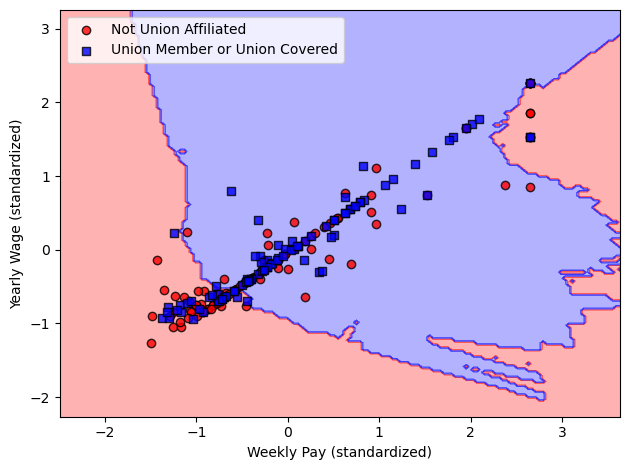

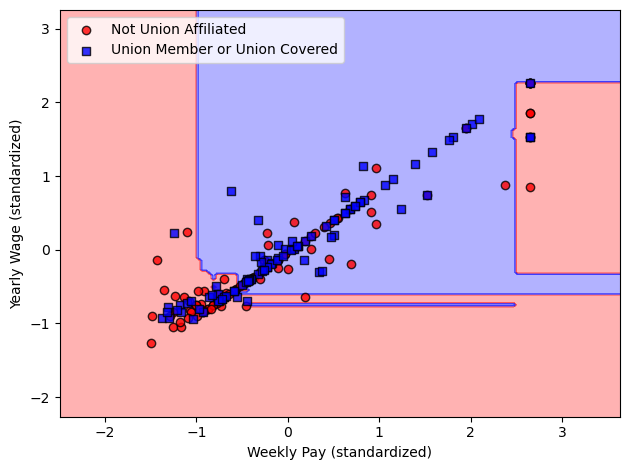


Pair 2


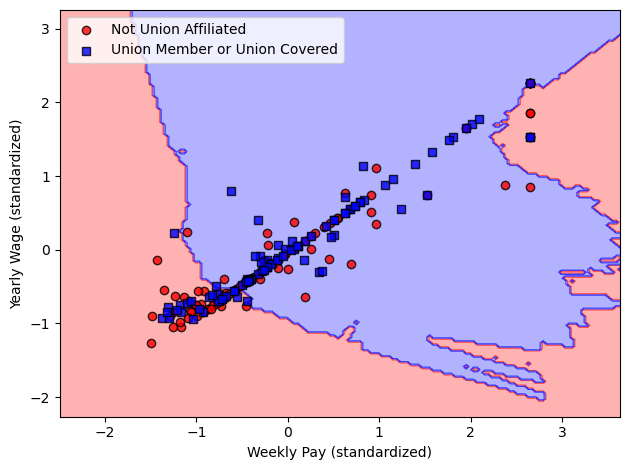

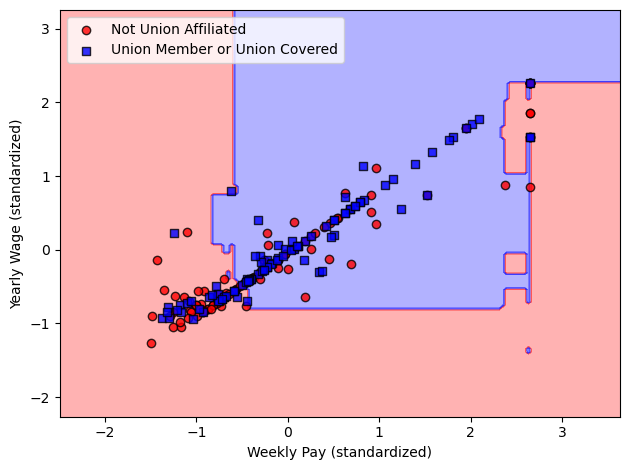


Pair 3


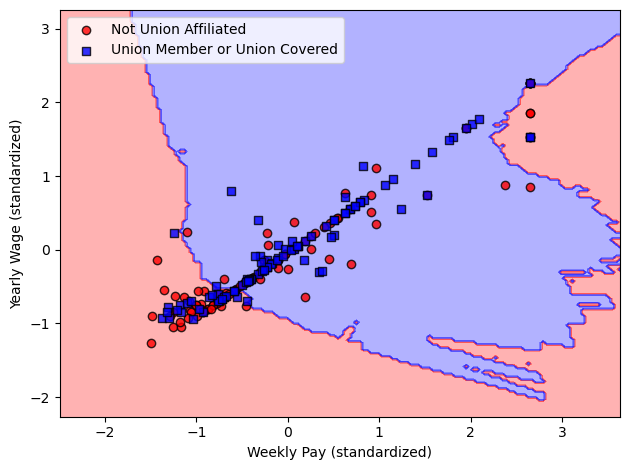

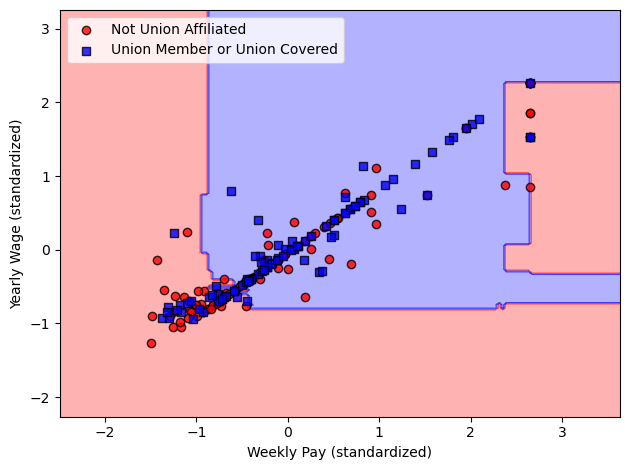


Pair 4


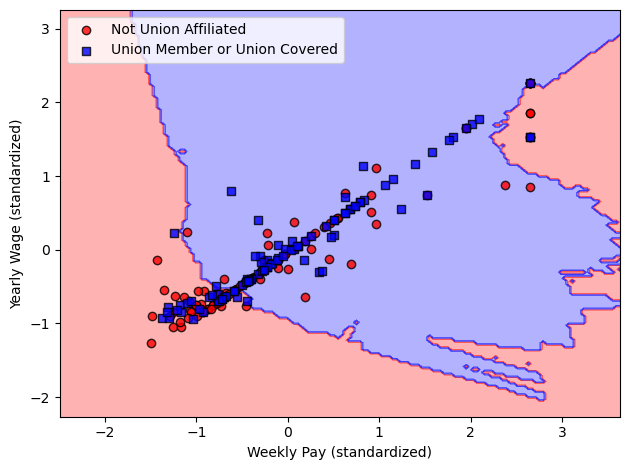

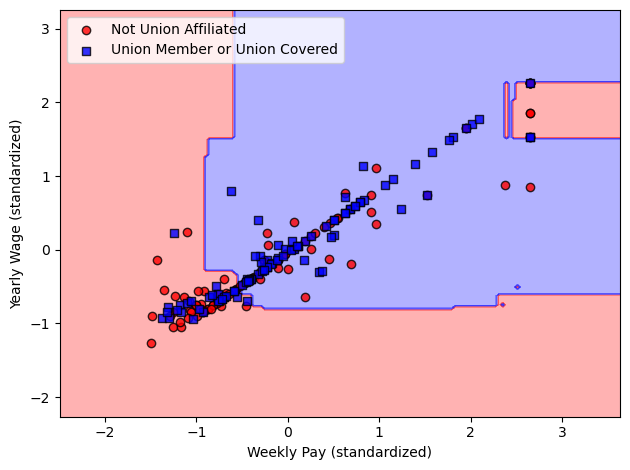

In [17]:
print("Pair 1")

plot_decision_regions(X_test_union_std_subset, y_test_union_subset, classifier=mv_RDT_union_1,
                      classification_0 = "Not Union Affiliated", classification_1 = "Union Member or Union Covered")

plt.xlabel('Weekly Pay (standardized)')
plt.ylabel('Yearly Wage (standardized)')
plt.legend(loc='upper left')
plt.tight_layout()
plt.show()

plot_decision_regions(X_test_union_std_subset, y_test_union_subset, classifier=forest_union_1,
                      classification_0 = "Not Union Affiliated", classification_1 = "Union Member or Union Covered")

plt.xlabel('Weekly Pay (standardized)')
plt.ylabel('Yearly Wage (standardized)')
plt.legend(loc='upper left')
plt.tight_layout()
plt.show()


print("\nPair 2")
plot_decision_regions(X_test_union_std_subset, y_test_union_subset, classifier=mv_RDT_union_2,
                      classification_0 = "Not Union Affiliated", classification_1 = "Union Member or Union Covered")

plt.xlabel('Weekly Pay (standardized)')
plt.ylabel('Yearly Wage (standardized)')
plt.legend(loc='upper left')
plt.tight_layout()
plt.show()

plot_decision_regions(X_test_union_std_subset, y_test_union_subset, classifier=forest_union_2,
                      classification_0 = "Not Union Affiliated", classification_1 = "Union Member or Union Covered")

plt.xlabel('Weekly Pay (standardized)')
plt.ylabel('Yearly Wage (standardized)')
plt.legend(loc='upper left')
plt.tight_layout()
plt.show()


print("\nPair 3")
plot_decision_regions(X_test_union_std_subset, y_test_union_subset, classifier=mv_RDT_union_3,
                      classification_0 = "Not Union Affiliated", classification_1 = "Union Member or Union Covered")

plt.xlabel('Weekly Pay (standardized)')
plt.ylabel('Yearly Wage (standardized)')
plt.legend(loc='upper left')
plt.tight_layout()
plt.show()

plot_decision_regions(X_test_union_std_subset, y_test_union_subset, classifier=forest_union_3,
                      classification_0 = "Not Union Affiliated", classification_1 = "Union Member or Union Covered")

plt.xlabel('Weekly Pay (standardized)')
plt.ylabel('Yearly Wage (standardized)')
plt.legend(loc='upper left')
plt.tight_layout()
plt.show()


print("\nPair 4")
plot_decision_regions(X_test_union_std_subset, y_test_union_subset, classifier=mv_RDT_union_4,
                      classification_0 = "Not Union Affiliated", classification_1 = "Union Member or Union Covered")

plt.xlabel('Weekly Pay (standardized)')
plt.ylabel('Yearly Wage (standardized)')
plt.legend(loc='upper left')
plt.tight_layout()
plt.show()

plot_decision_regions(X_test_union_std_subset, y_test_union_subset, classifier=forest_union_4,
                      classification_0 = "Not Union Affiliated", classification_1 = "Union Member or Union Covered")

plt.xlabel('Weekly Pay (standardized)')
plt.ylabel('Yearly Wage (standardized)')
plt.legend(loc='upper left')
plt.tight_layout()
plt.show()

For the union data set, the decision boundaries of my ensembles contain a number of lines and shapes jutting out, seemingly randomly. (If I were to plot all data points they may seem less random, but that requires too much computation.) On top of that, I feel like I could reason about how the random forests came to conclusions better than I could for my ensembles. None of my ensembles for this data set are reasonably interpretable.

The cell below plots the decision regions for each pair of classifiers and the testing set for GSA buildings.

Pair 1


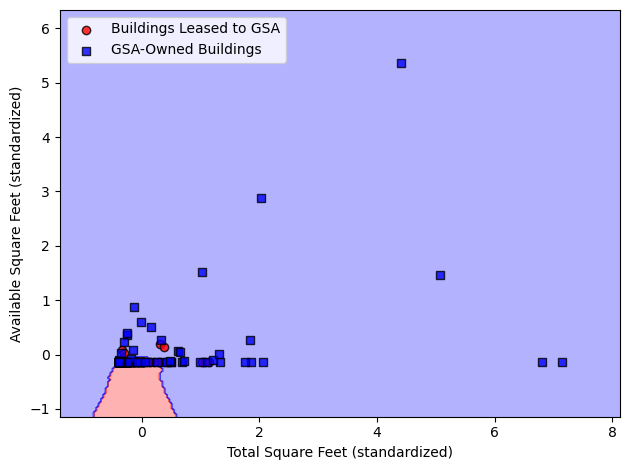

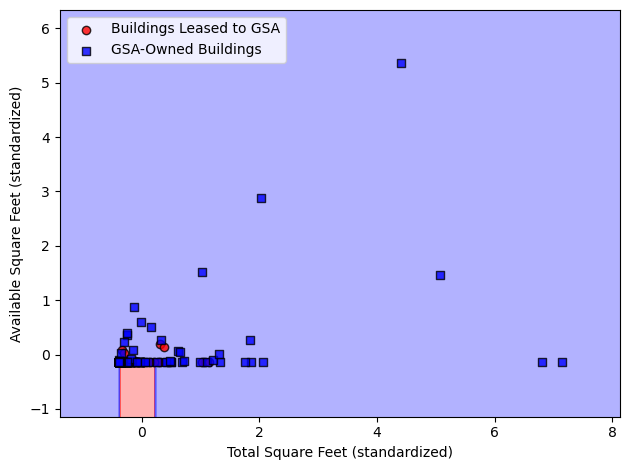


Pair 2


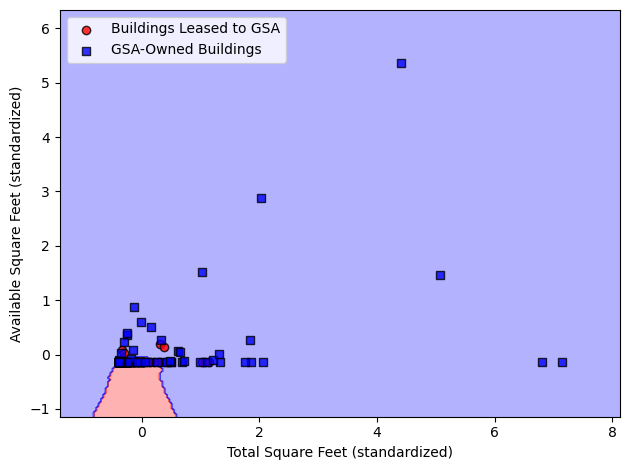

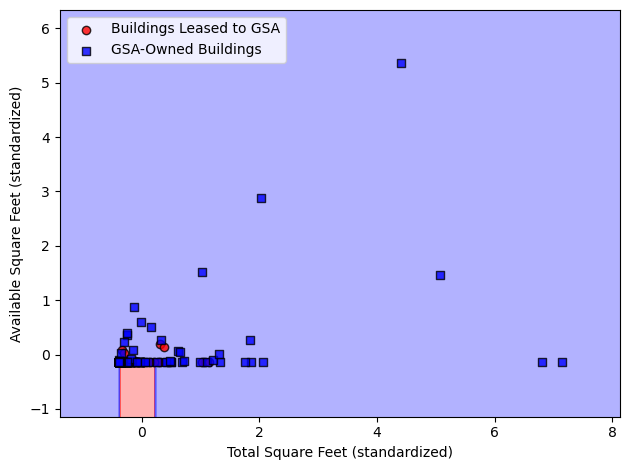


Pair 3


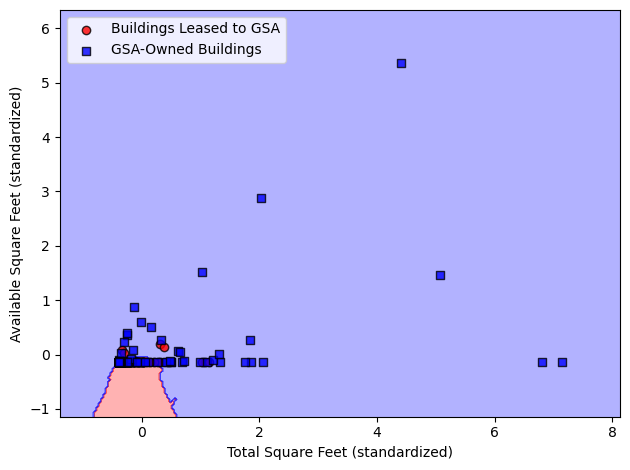

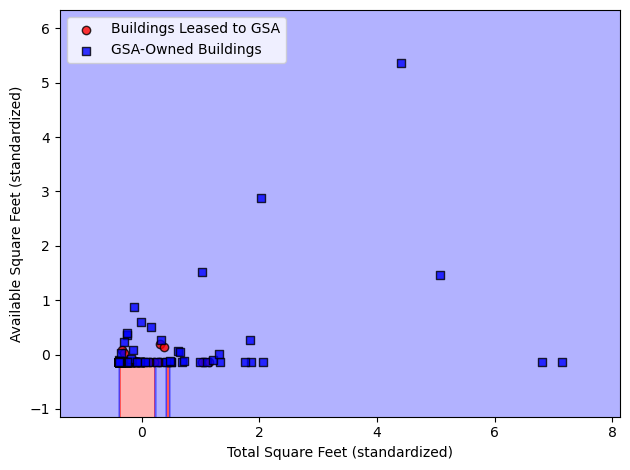


Pair 4


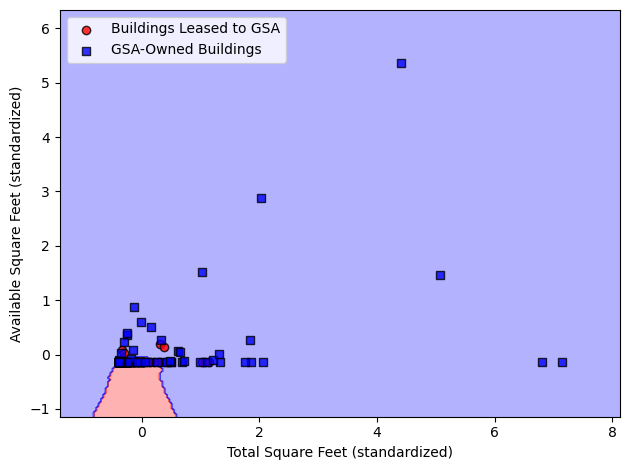

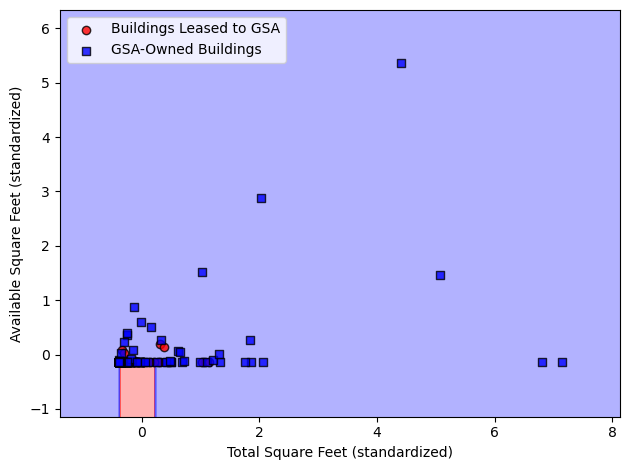

In [18]:
print("Pair 1")
plot_decision_regions(X_test_buildings_std_subset, y_test_buildings_subset, classifier=mv_RDT_buildings_1,
                      classification_0 = "Buildings Leased to GSA", classification_1 = "GSA-Owned Buildings")

plt.xlabel('Total Square Feet (standardized)')
plt.ylabel('Available Square Feet (standardized)')
plt.legend(loc='upper left')
plt.tight_layout()
plt.show()

plot_decision_regions(X_test_buildings_std_subset, y_test_buildings_subset, classifier=forest_buildings_1,
                      classification_0 = "Buildings Leased to GSA", classification_1 = "GSA-Owned Buildings")

plt.xlabel('Total Square Feet (standardized)')
plt.ylabel('Available Square Feet (standardized)')
plt.legend(loc='upper left')
plt.tight_layout()
plt.show()


print("\nPair 2")
plot_decision_regions(X_test_buildings_std_subset, y_test_buildings_subset, classifier=mv_RDT_buildings_2,
                      classification_0 = "Buildings Leased to GSA", classification_1 = "GSA-Owned Buildings")

plt.xlabel('Total Square Feet (standardized)')
plt.ylabel('Available Square Feet (standardized)')
plt.legend(loc='upper left')
plt.tight_layout()
plt.show()

plot_decision_regions(X_test_buildings_std_subset, y_test_buildings_subset, classifier=forest_buildings_2,
                      classification_0 = "Buildings Leased to GSA", classification_1 = "GSA-Owned Buildings")

plt.xlabel('Total Square Feet (standardized)')
plt.ylabel('Available Square Feet (standardized)')
plt.legend(loc='upper left')
plt.tight_layout()
plt.show()


print("\nPair 3")
plot_decision_regions(X_test_buildings_std_subset, y_test_buildings_subset, classifier=mv_RDT_buildings_3,
                      classification_0 = "Buildings Leased to GSA", classification_1 = "GSA-Owned Buildings")

plt.xlabel('Total Square Feet (standardized)')
plt.ylabel('Available Square Feet (standardized)')
plt.legend(loc='upper left')
plt.tight_layout()
plt.show()

plot_decision_regions(X_test_buildings_std_subset, y_test_buildings_subset, classifier=forest_buildings_3,
                      classification_0 = "Buildings Leased to GSA", classification_1 = "GSA-Owned Buildings")

plt.xlabel('Total Square Feet (standardized)')
plt.ylabel('Available Square Feet (standardized)')
plt.legend(loc='upper left')
plt.tight_layout()
plt.show()


print("\nPair 4")
plot_decision_regions(X_test_buildings_std_subset, y_test_buildings_subset, classifier=mv_RDT_buildings_4,
                      classification_0 = "Buildings Leased to GSA", classification_1 = "GSA-Owned Buildings")

plt.xlabel('Total Square Feet (standardized)')
plt.ylabel('Available Square Feet (standardized)')
plt.legend(loc='upper left')
plt.tight_layout()
plt.show()

plot_decision_regions(X_test_buildings_std_subset, y_test_buildings_subset, classifier=forest_buildings_4,
                      classification_0 = "Buildings Leased to GSA", classification_1 = "GSA-Owned Buildings")

plt.xlabel('Total Square Feet (standardized)')
plt.ylabel('Available Square Feet (standardized)')
plt.legend(loc='upper left')
plt.tight_layout()
plt.show()

For the GSA buildings data set, the decision boundaries of the first, second, and fourth ensembles of rotated decision trees seem to consist of simple shapes like arcs and lines, so I would consider them reasonably interpretable. <br>
There is a seemingly random offshoot on the decision boundary of the third ensemble. Also, because of the simplicity of the corresponding random forest, I feel I could reason about its decision process better than I could for my ensemble. As such, this ensemble is not reasonably interpretable.

The cell below plots the decision regions for each pair of classifiers and the testing set regarding student loans and college classification.

Pair 1


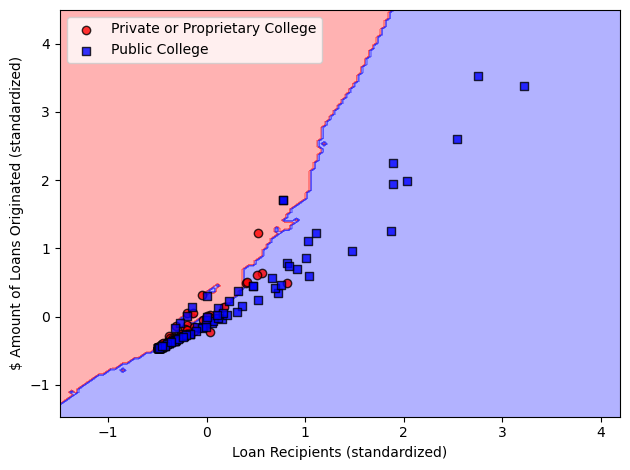

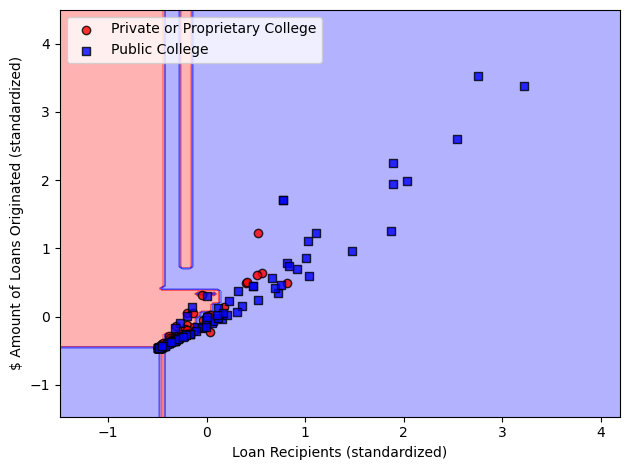


Pair 2


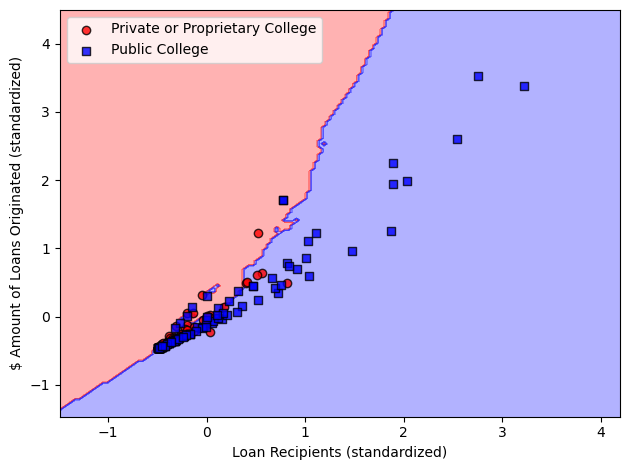

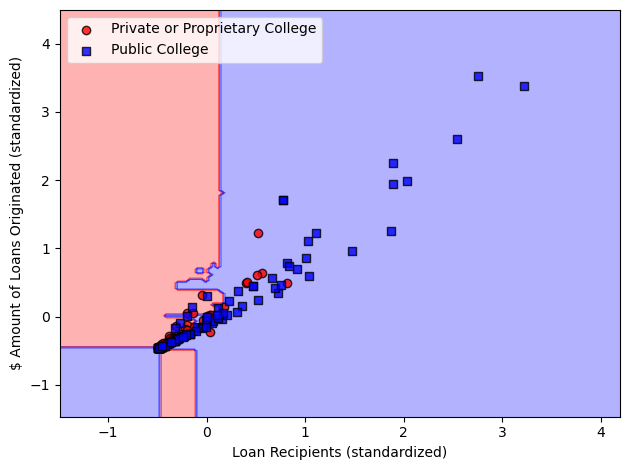


Pair 3


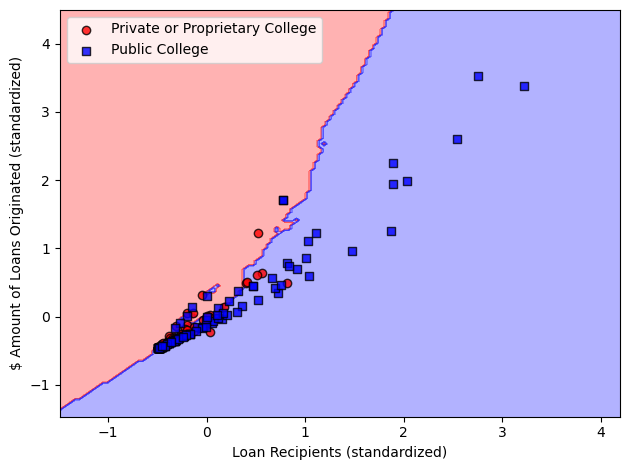

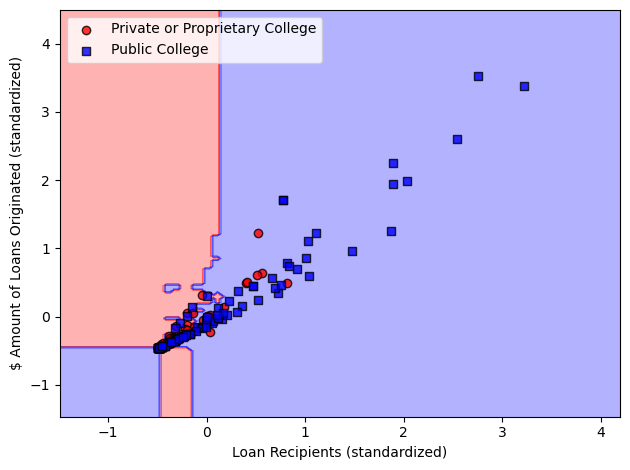


Pair 4


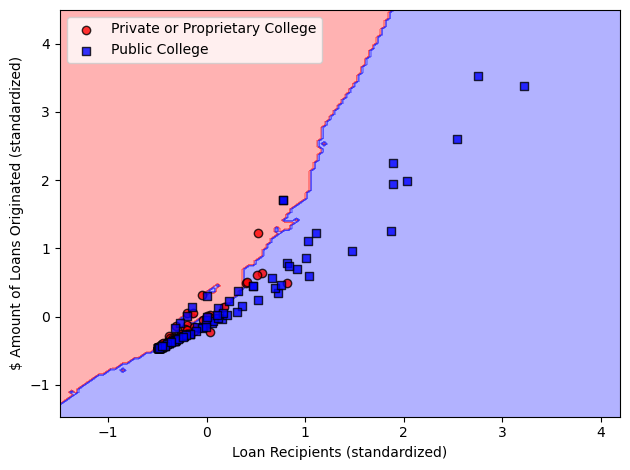

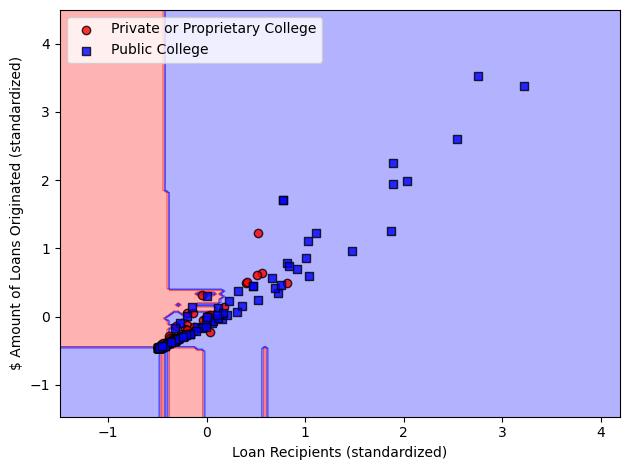

In [19]:
print("Pair 1")
plot_decision_regions(X_test_loans_std_subset, y_test_loans_subset, classifier=mv_RDT_loans_1,
                      classification_0 = "Private or Proprietary College", classification_1 = "Public College")

plt.xlabel('Loan Recipients (standardized)')
plt.ylabel('$ Amount of Loans Originated (standardized)')
plt.legend(loc='upper left')
plt.tight_layout()
plt.show()

plot_decision_regions(X_test_loans_std_subset, y_test_loans_subset, classifier=forest_loans_1,
                      classification_0 = "Private or Proprietary College", classification_1 = "Public College")

plt.xlabel('Loan Recipients (standardized)')
plt.ylabel('$ Amount of Loans Originated (standardized)')
plt.legend(loc='upper left')
plt.tight_layout()
plt.show()


print("\nPair 2")
plot_decision_regions(X_test_loans_std_subset, y_test_loans_subset, classifier=mv_RDT_loans_2,
                      classification_0 = "Private or Proprietary College", classification_1 = "Public College")

plt.xlabel('Loan Recipients (standardized)')
plt.ylabel('$ Amount of Loans Originated (standardized)')
plt.legend(loc='upper left')
plt.tight_layout()
plt.show()

plot_decision_regions(X_test_loans_std_subset, y_test_loans_subset, classifier=forest_loans_2,
                      classification_0 = "Private or Proprietary College", classification_1 = "Public College")

plt.xlabel('Loan Recipients (standardized)')
plt.ylabel('$ Amount of Loans Originated (standardized)')
plt.legend(loc='upper left')
plt.tight_layout()
plt.show()


print("\nPair 3")
plot_decision_regions(X_test_loans_std_subset, y_test_loans_subset, classifier=mv_RDT_loans_3,
                      classification_0 = "Private or Proprietary College", classification_1 = "Public College")

plt.xlabel('Loan Recipients (standardized)')
plt.ylabel('$ Amount of Loans Originated (standardized)')
plt.legend(loc='upper left')
plt.tight_layout()
plt.show()

plot_decision_regions(X_test_loans_std_subset, y_test_loans_subset, classifier=forest_loans_3,
                      classification_0 = "Private or Proprietary College", classification_1 = "Public College")

plt.xlabel('Loan Recipients (standardized)')
plt.ylabel('$ Amount of Loans Originated (standardized)')
plt.legend(loc='upper left')
plt.tight_layout()
plt.show()


print("\nPair 4")
plot_decision_regions(X_test_loans_std_subset, y_test_loans_subset, classifier=mv_RDT_loans_4,
                      classification_0 = "Private or Proprietary College", classification_1 = "Public College")

plt.xlabel('Loan Recipients (standardized)')
plt.ylabel('$ Amount of Loans Originated (standardized)')
plt.legend(loc='upper left')
plt.tight_layout()
plt.show()

plot_decision_regions(X_test_loans_std_subset, y_test_loans_subset, classifier=forest_loans_4,
                      classification_0 = "Private or Proprietary College", classification_1 = "Public College")

plt.xlabel('Loan Recipients (standardized)')
plt.ylabel('$ Amount of Loans Originated (standardized)')
plt.legend(loc='upper left')
plt.tight_layout()
plt.show()

For the college loan data, while the decision boundaries of my ensembles are not especially simple, they do seem to follow the data in an intuitive way. On the other hand, there are so many small inexplicable details in all the random forests, especially where there are more data points, as well as seemingly random offshoots. I feel I could reason as to how all my ensembles came to decisions better than I could for their corresponding random forests. As such, they are all reasonably interpretable.

All majority vote ensembles of rotated decision trees for the union data set are not reasonably interpretable. As such, my ensemble fails the criterion for interpretability.

## Reviewing Accuracy
This last code cell shows the accuracy (as a proportion) of each rotated decision tree ensemble and random forest in identifying the classes of elements from the testing data. Then, it is noted whether tha accuracy of each rotated decision tree ensemble is greater than 95% of the accuracy of the random forest in the same pair. <br>
This code, particularly the union section, takes a long time to complete. If you wish to run it, I recommend commenting out the union for-loop.

In [20]:
clf_mv_labels = ["Rotated Decision Tree Ensemble 1", "Rotated Decision Tree Ensemble 2",
              "Rotated Decision Tree Ensemble 3", "Rotated Decision Tree Ensemble 4"]
clf_rf_labels = ["Random Forest 1", "Random Forest 2", "Random Forest 3", "Random Forest 4"]

union_mv_clf = [mv_RDT_union_1, mv_RDT_union_2, mv_RDT_union_3, mv_RDT_union_4]
union_rf_clf = [forest_union_1, forest_union_2,forest_union_3, forest_union_4]

buildings_mv_clf = [mv_RDT_buildings_1, mv_RDT_buildings_2, mv_RDT_buildings_3, mv_RDT_buildings_4]
buildings_rf_clf = [forest_buildings_1, forest_buildings_2,forest_buildings_3, forest_buildings_4]

loans_mv_clf = [mv_RDT_loans_1, mv_RDT_loans_2, mv_RDT_loans_3, mv_RDT_loans_4]
loans_rf_clf = [forest_loans_1, forest_loans_2,forest_loans_3, forest_loans_4]

print("Classifying Workers by Union Affiliation")
for i in range(4):
    mv_clf = union_mv_clf[i]
    rf_clf = union_rf_clf[i]
    mv_label = clf_mv_labels[i]
    rf_label = clf_rf_labels[i]
    
    mv_RDT_score = mv_clf.score(X_test_union, y_test_union)
    print("Accuracy of", mv_label + ":", mv_RDT_score)
    rf_score = rf_clf.score(X_test_union, y_test_union)
    print("Accuracy of", rf_label + ":", rf_score)
    if mv_RDT_score > 0.95 * rf_score:
        print("Success: This ensemble of decision trees has an accuracy greater than 95% the accuracy of the corresponding random forest.\n")
    else:
        print("Failure: This ensemble of decision trees does not have an accuracy greater than 95% the accuracy of the corresponding random forest.\n")
print("")

print("Classifying Buildings by Whether they are GSA-Owned or Leased")
for mv_clf, rf_clf, mv_label, rf_label in zip(buildings_mv_clf, buildings_rf_clf, clf_mv_labels, clf_rf_labels):
    mv_RDT_score = mv_clf.score(X_test_union, y_test_union)
    print("Accuracy of", mv_label + ":", mv_RDT_score)
    rf_score = rf_clf.score(X_test_union, y_test_union)
    print("Accuracy of", rf_label + ":", rf_score)
    if mv_RDT_score > 0.95 * rf_score:
        print("Success: This ensemble of decision trees has an accuracy greater than 95% the accuracy of the corresponding random forest.\n")
    else:
        print("Failure: This ensemble of decision trees does not have an accuracy greater than 95% the accuracy of the corresponding random forest.\n")
print("")

print("Classifying Schools as Private/Proprietary or Public")
for mv_clf, rf_clf, mv_label, rf_label in zip(loans_mv_clf, loans_rf_clf, clf_mv_labels, clf_rf_labels):
    mv_RDT_score = mv_clf.score(X_test_union, y_test_union)
    print("Accuracy of", mv_label + ":", mv_RDT_score)
    rf_score = rf_clf.score(X_test_union, y_test_union)
    print("Accuracy of", rf_label + ":", rf_score)
    if mv_RDT_score > 0.95 * rf_score:
        print("Success: This ensemble of decision trees has an accuracy greater than 95% the accuracy of the corresponding random forest.\n")
    else:
        print("Failure: This ensemble of decision trees does not have an accuracy greater than 95% the accuracy of the corresponding random forest.\n")

Classifying Workers by Union Affiliation
Accuracy of Rotated Decision Tree Ensemble 1: 0.4894615076328925
Accuracy of Random Forest 1: 0.5518635916493606
Failure: This ensemble of decision trees does not have an accuracy greater than 95% the accuracy of the corresponding random forest.

Accuracy of Rotated Decision Tree Ensemble 2: 0.4894615076328925
Accuracy of Random Forest 2: 0.5522188217291507
Failure: This ensemble of decision trees does not have an accuracy greater than 95% the accuracy of the corresponding random forest.

Accuracy of Rotated Decision Tree Ensemble 3: 0.4895525922687361
Accuracy of Random Forest 3: 0.551872700112945
Failure: This ensemble of decision trees does not have an accuracy greater than 95% the accuracy of the corresponding random forest.

Accuracy of Rotated Decision Tree Ensemble 4: 0.4894615076328925
Accuracy of Random Forest 4: 0.560288920464896
Failure: This ensemble of decision trees does not have an accuracy greater than 95% the accuracy of the cor

Every ensemble of rotated decision trees in the union section failed to be at least 95% as accurate as the corresponding random forest. As such, my ensemble fails the criterion for accuracy.

## Conclusions
The majority vote ensembles of rotated decision trees fail both criteria of interpretability and accuracy. As such, my ensemble is not successful. It is interesting that the union data set was where the interpretability and accuracy of my model were worst, whereas the ensembles performed quite well in the GSA buildings and college loans data sets. In addition, the ensemble was quite slow to train and somewhat slow in giving predictions, especially compared to the random forest. <br><br>
One thing to note is that all these data sets are not linearly separable, and they all have small areas where most points are concentrated. The best accuracy of my ensemble was ~51.2%, compared to the best accuracy of ~56.0% for the random forest. Perhaps categorizing these data sets was inherently tricky, especially for the data sets my ensembles performed better on. As such, the accuracy and interpretability seen in this project may not be representative of what someone applying machine learning classifiers to a specific purpose would see. Likewise, only binary classification was used, so my results would certainly not be representative of how my ensembles would perform with more than three classes. <br><br>
Furthermore, there seems to have been almost no randomness in my ensembles, as for each data set, they were all identical or nearly identical. My hypothesis is that they consist of many of the same decision trees, which all make the same greedy choices. As such, there was no need to create 4 majority vote ensembles of rotated decision trees per data set. But testing how three majority vote ensembles perform is limited. If I were to redo this test of the accuracy and interpretability of my ensembles, I would either find more data sets or introduce a random element to the rotated decision trees in the ensembles. <br><br>
My ensembles took a very long time to train and some time to predict. I imagine this is due to having to rotate and standardize every element of the data set for every decision tree, which is a massive task for the union affiliation data from CEPR, containing over 290,000 elements. Performing these rotations and standardizations in Python, an interpreted language, probably slows down this process even more. <br><br>
Because my ensembles took so long to train, both they and the random forests could only contain 30 trees each. This is a relatively small number of trees, and it may not have been possible for my ensemble to achieve better accuracy without more. Furthermore, it could have been the case that, with more trees, my ensemble's decision boundary could have been smoother, whereas the random forest's decision boundary could be more complex. As such, more trees per ensemble could have helped with both accuracy and interpretability.

## Related Work
As it turns out, my majority vote ensemble of rotated decision trees are very similar to the rotation forest. As described in Liam Earley's implimentation, a rotation forest is a forest of randomly rotated decision trees, which uses matrix algebra. The rotation forest, like my ensemble, has an advantage in finding diagonal lines and curves for classifying data. Unlike my ensemble, a rotation forest can work with two features; my ensemble, for geometric reasons, cannot. <br><br>
Research by A. Bagnall and others shows that rotation forests perform very well in categorizing continuous data with curved decision boundaries, often better than random forests. A major downside, which I ran into for my ensemble, is that building and training random forests takes a long time. Their solution was to deliberately impose a cap on the runtime for a rotation forest, but one just large enough to keep the accuracy benefits. <br><br>
Related to the rotation forest is Rico Blaser's and Piotr Fryzlewicz's Random Rotation Ensembles. In addition to rotation, their forests translate, scale, and shear decision trees. The example decision boundary of a random rotation ensemble shown is very precise and quite smooth compared to a random forest, which allows for diagonal lines and curves along the decision boundary and, in addition, would meet my metric for interpretability (namely a decision boundary consisting of simple arcs and shapes). The paper states that the performance of individual learners from random rotation ensembles is not severely impacted by the random rotations. This is quite different from my ensembles, in which training and (to an extent) predicting can take a long time. <br>
#### References
 * Early, Liam. 2020. “RotationForest.” GitHub. Last modified January 21. https://github.com/Liam-E2/RotationForest/tree/master.
 * Bagnall, A., M. Flynn, J. Large, J. Lines, A. Bostrom, and G. Cawley. 2020. "Is rotation forest the best classifier for problems with continuous features?" https://arxiv.org/pdf/1809.06705.
 * Blaser, Rico, and Piotr Fryzlewicz. 2016. “Random Rotation Ensembles.” (MIT) Journal of Machine Learning Research 17: 1-26. https://jmlr.csail.mit.edu/papers/volume17/blaser16a/blaser16a.pdf.

## Suggestions for Future Work
There is already a whole host of work in the realm of rotation forests and related machine learning models, work toward finding curved decision boundaries that can be more accurate and at times more interpretable than the decision boundaries of random forests. And these models find such boundaries successfully. There is some problem with speed, but this can be mitigated by placing a cap on runtime. Furthermore, they work with more than two features. These issues of interpretable decision boundaries and accuracy are the main problem my majority vote ensemble of rotated decision trees was meant to solve. As such, to get accurate, curving decision boundaries, it may be worthwhile to work with rotation forests, random rotation ensembles, and similar models. <br><br>
There could still be some benefit to the consisted rotations of my majority vote ensembles of rotated decision trees. Whatever improvements to speed are possible should be included in redesigning them. The decision trees should also have a more random factor, rather than just a greedy one, as I believe this would grant the ensemble more information. With that in mind, I would find it interesting to test how my ensembles, with their consistent rotations, would compare to a rotation forest with random rotations in achieving accurate results and smooth, interpretable decision boundaries for two features with the same time constraints. The data sets on which they are tested on should also be broader, with variety in the number of classes. Additionally, some should at least be closer to being linearly separable, which perhaps means some data sets containing a more intuitive correlation between classes and data than my GSA buildings and college loans data sets had. <br><br>
While the decision boundaries of rotated decision trees and a modified version of my ensemble could be interpretable relative to the data, their process could remain somewhat mysterious. I could not find this online, but I find it very interesting to see a data structure that created a plethora of rotated decision trees from various angles and chooses the most accurate one. In my mind, this would probably have much of the interpretability of decision trees and logistic regressions, with potentially improved accuracy. As such, I think it would be a good idea to test the "best" rotated decision tree classifiers against ordinary decision tree and logistic regression classifiers and see how ther perform in terms of accuracy and (if necessary) interpretability. (A notable downside would be that finding the best rotated decision tree would take much longer than creating a single decision tree.)